In [9]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple

In [10]:
def gen_random_points(n: int) -> Tuple[np.ndarray, np.ndarray]:
    return np.random.rand(n, 2)

def do_knn(points: np.ndarray, k: int, n: int) -> np.array:
    # If `replace=False`, then `ridx` will have `k` unique values.
    ridx = np.random.choice(range(points.shape[0]), k, replace=False)
    centroids = points[ridx, :]
    for _ in range(n):
        dists = np.empty((points.shape[0], k))
        for ci in range(k):
            dists[:, ci] = np.sum((points - centroids[ci])**2, axis=1)
        group_idx = np.argmin(dists, axis=1)
        for ci in range(k):
            centroids[ci] = np.mean(points[group_idx == ci], axis=0)
    return centroids, group_idx

In [11]:
K = 4
data = gen_random_points(150)
centroids, group_idx = do_knn(data, K, 100)

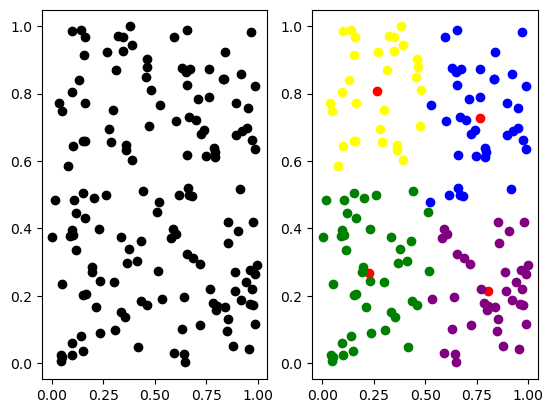

In [12]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(data[:, 0,], data[:, 1], color='black')
ax[1].scatter(centroids[:, 0], centroids[:, 1], color='red')
colors = ['green', 'blue', 'yellow', 'purple']
for ci in range(K):
    ax[1].scatter(data[group_idx == ci, 0], data[group_idx == ci, 1], color=colors[ci])
plt.show()